### Практические работы 1-3
<br>
Выполнила: Галиуллина Алина
<br>
Направление: аналитика данных
<br>
Тема работ: кластерный анализ
<br>
Задача: леденцы (№1)
<br>
Основные комментарии по существу задачи будут в ячейках "Markdown". Примечания по коду будут закомментированы в ячейках самого кода

### Работа №1 - иерархический кластерный анализ

In [190]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

plt.style.use('seaborn')

In [191]:
# Указываем рабочую папку
os.chdir("C:/Users/qwerty/Desktop/ИТМО/АД на python/Задачи для лабораторной 1-3/задача_1_леденцы")

In [192]:
# Считаем данные, указав разделитель
df = pd.read_csv('Леденцы.dat', sep = ';')

# Выведем первые 5 строк таблицы df для проверки корректности данных
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


### ШАГ 0. Знакомство с даннымии их осмысление. Постановка задачи.
<br>
В данных нет пропусков, что упрощает нам работу.

Имеем 338 участников опроса (=строк=записей), которые давали оценку 11-ти утверждениями (=столбцам=атрибутам). Участники ставили оценки от 2 до 5. Резонно предположить, что шкала оценивания была до 5 включительно. Но непонятно: участники не ставили оценки ниже двойки из вежливости? :)
<br>
Средние значения у разных атрибутов отличаются друг от друга (как и выборочные дисперсии). Для всех атрибутов медиана равняется 3, а вот межквартильный размах отличается. Причем у атрибутов V5, V6, V7, V8 значения трех квартилей (Q1, Q2, Q3) совпадают и равняются 3. Т.е. большая часть опрошенных невысоко оценила высказывания V5-V8. 
<br>
Требуется разделить объекты(=записи) на интерпретируемые группы - кластеры. Определить число кластеров с помощью иерархического  кластерного анализа.

In [193]:
# Проверим, нет ли пропусков.
pd.isnull(df).sum()
#  Их нет ни в одном столбце, отлично, двигаемся дальше

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64

In [194]:
# Постараемся осмыслить, с какими данными будем работать.
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### ШАГ 1. Отбор переменных
<br>
В данной задаче разделяем на кластеры участников опроса на основании поставленных ими баллов различным высказываниям. Лишних данных нет

### ШАГ 2. Стандартизация
<br>
Стандартизация в данном случае не нужна, потому что все данные представлены в одной и той же шкале

### ШАГИ 3,4. Способ определения расстояния между кластерами и объектами. Получение результатов и интерпретация
<br>
Существует несколько способов измерять расстояние между кластерами (Варда, среднее невзвешенное, ближайшего соседа и т.д.) и объектами (евклидово, квадрат евклидова, манхэттен и т.д.)
<br>
Для начала будем использовать метод Варда и евклидову метрику. После основных выводов будут рассмотрены некоторые другие методы и метрики (об этом позже)

In [195]:
# Получим матрицу связи с помощью функции linkage. Буква w обозначает сокращение метода Ward,
# а буква e - скоращение метрики Euclidean

link_w_e = linkage(df, 'ward', 'euclidean')

# link_w_e.shape
# Получим матрицу размерности (n-1) x 4, где n = 338 - число записей (=объектов=участников)
# В столбцах с индексами 0,1 содержатся номера кластеров на каждом шаге объединения.
# В столбце с индексом 2 содержится расстояние между объединяемыми кластерами
# В столбце с индексом 3 содержится кол-во объектов в результирующем кластере

link_w_e

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

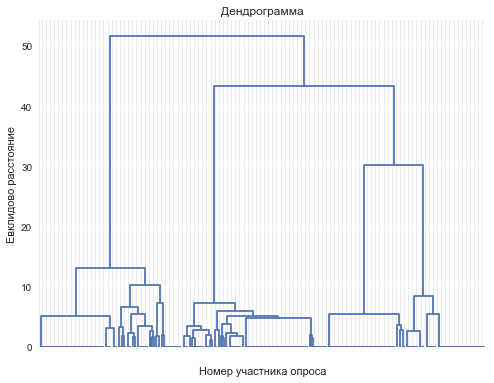

In [196]:
# Построим первую дендрограмму на основании матрицы связи. Оставим только один цвет, чтобы самостоятельно
# принять решение о количестве кластеров
fig = plt.figure(figsize = (8,6))
dend = dendrogram(link_w_e, color_threshold = -1)
plt.xticks(color='w')
plt.title('Дендрограмма')
plt.ylabel('Евклидово расстояние')
plt.xlabel('Номер участника опроса')
plt.show()

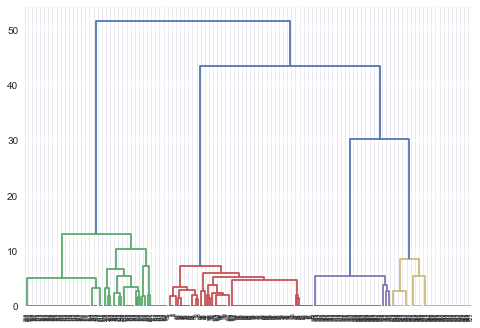

In [197]:
# Предварительно кажется, что все данные разбиты на 4 кластера. После значения порядка 15 (по оси y) расстояния между
# объединяемыми кластерами велики (о чем говорит длина вертикальных линий на дендрограмме)

# Построим "цветную" дендрограмму, выбрав пороговое значение расстояния равным 17.0
dend = dendrogram(link_w_e, color_threshold = 17.0)

In [198]:
# Добавим столбец к исходной таблице, в котором укажем номер кластера для каждой записи (=строки=участника).
# Выполним с помощью функции fcluster на основании матрицы связи link_w_e
# Пороговое значение по-прежнему 17.0
df['cluster_w_e'] = fcluster(link_w_e, 17.0, criterion = 'distance')

# df

In [199]:
# Посмотрим на средние значения каждого из атрибутов (=столбцов) после разделения на 4 кластера
df.groupby('cluster_w_e').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster_w_e,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


Оцениваемые участниками высказывания:

V1: Я потребляю леденцы, чтобы освежить дыхание

V2: Я потребляю леденцы, чтобы чувствовать себя увереннее

V3: Я потребляю леденцы, чтобы освежить полость рта

V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту

V5: Я потребляю леденцы как заменитель других кондитерских изделий

V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого

V7: Леденцы помогают мне сконцентрироваться

V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать

V9: Я потребляю леденцы для того, чтобы облегчить боль в горле

V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа

V11: Я потребляю леденцы для улучшения самочувствия

### Осмысление результатов
Мы разделили всех участников опроса на 4 кластера на основании их оценок высказываний.
Внимательнее взглянем на каждый кластер. Выше для удобства продублировано описание каждого из высказываний

<b>Группа №1 </b> - Высокие средние баллы по высказываниям V9- V11 (по каждому высказыванию оценка более 4.8). По остальным высказываниям средний балл не превышает 3. Эти люди используют леденцы при лечении болезней, например, простуды, заложенности носа (наивные...). Им не особо важны другие функции леденцов. Если кратко - группа <b>"больные"</b>.

<b>Группа №2</b> - Высокие средние баллы по высказываниям V1-V3 (и V4).  По остальным высказываниям средний балл примерно равен 3. Участники в данном кластере приобретают леденцы для косметического эффекта леденцов. Если кратко - группа <b>"чистюли"</b>.

<b>Группа №3</b> - Высокие средние баллы по высказываниям V7-V8 (близки к максимальному баллу). По остальным высказываниям средний балл примерно равен 3. Эти люди используют леденцы для того, чтобы подумать над чем-то в процессе поедания леденцов. Если кратко - группа <b>"мыслители"</b>.

<b>Группа №4</b> - Высокие баллы по высказываниям V5-V6.  По остальным высказываниям средние оценки невысоки, не превышают 3. Эти люди явно заменяют леденцами другие сладкие продукты, и это основная цель, по которой люди приобретают леденцы. Если кратко- <b>"сладкоежки"</b>.Уверена, что на большинстве упаковок написано, что в леденцах "нет сахара", это отличный способ заверить покупателя не только в том, что продукт не вреден, но что и полезен...

Мы получили результаты, которые поддаются логичной интерпретации. На этом основную часть при использовании одного метода (Варда) считаем выполненной. Рассмотрим дополнительные возможности питона для анализа, затем попробуем применить другие методы и метрики.

In [200]:
# Можно просто получить матрицу, содержащую номер кластера для каждого наблюдения

from sklearn.cluster import AgglomerativeClustering

# Указываем количество кластеров, методы определения расстояния между объектами и кластерами соответственно
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [201]:
# Посмотрим, сколько значений в каждом из кластеров.
df.groupby('cluster_w_e').size()

# Лирическое отступление
#  В методе иерархического кластерного анализа требуется хранить матрицу попарных расстояний,
# что при больших данных сильно сказывается на времени вычисления (требовании к оперативной
# памяти). В задании данных не так много, но построение дендрограмммы, например, занимает некоторое время.
# Интересно будет сравнить вычислительные затраты при использовании каждого метода кластеризации...

cluster_w_e
1    108
2    110
3     59
4     61
dtype: int64

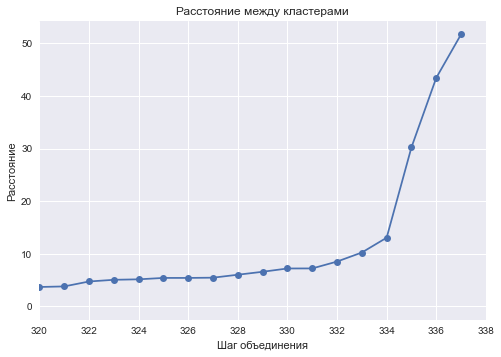

In [202]:
# Построим график каменистой осыпи. Выберем 3-ий столбец матрицы link_w_e, в котором хранится информация о расстоянии между
# объединяемыми кластерами
dist_w_e = link_w_e[:, 2]

# Шаги объединения будут в ранговой переменной idxs
idxs = range(1, len(dist_w_e) + 1)
plt.plot(idxs, dist_w_e, marker = 'o')
plt.title('Расстояние между кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
# Выберем интересующую область по оси абсцисс.
plt.xlim(320, 338)
plt.show()
# Значительный рост расстояния между объединяемыми кластерами наблюдается начиная с 334 шага. До этого момента сформированы
# 4 кластера.

In [203]:
# Попробуем изменить способ измерения расстояния между объектами и м/у кластерами

In [204]:
# Получим матрицу связи с помощью функции linkage. 

link_w_c = linkage(df, 'ward', 'cityblock')

# Упс... Видим ошибку о том, что для метода Варда должно использоваться евклидово расстояние

ValueError: Method 'ward' requires the distance metric to be Euclidean

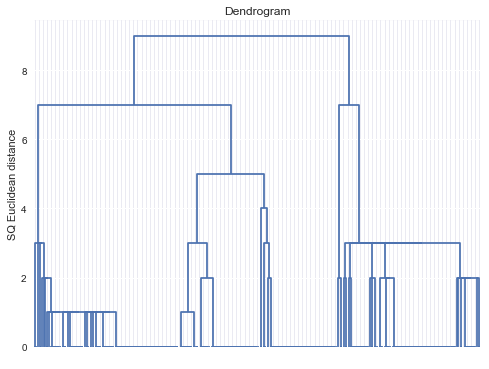

In [205]:
# Получим матрицу связи с помощью функции linkage для метода ближайшего соседа и квадрата евклидова расстояния. 

link_s_s = linkage(df, 'single', 'sqeuclidean')

# link_s_s.shape


fig = plt.figure(figsize = (8,6))
dend = dendrogram(link_s_s, color_threshold = -1)
plt.title('Dendrogram')
plt.xticks(color='w')
plt.ylabel('SQ Euclidean distance')
plt.show()

In [206]:
# На данной дендрограмме мне видится 4 кластера. При этом не до конца понятно, почему при объединении двух кластеров справа
# между ними значительное расстояние. Кажется, что не нужно объединять вторую и третью группу, а объединить все наблюдения
# слева.

# Установим пороговое значение и выведем средние значения признаков в каждой группе.
# Интересно получается: при пороговом значении, равном 7, происходит объединение из 4-х кластеров сразу в 2.
# 2 кластера в данном примере уж слишком мало, рассмотрим вариант с 4-мя кластерами
 
df['cluster_s_s'] = fcluster(link_s_s, 6.99, criterion = 'distance')
df.groupby('cluster_s_s').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_w_e
cluster_s_s,,,,,,,,,,,,
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.000000
2,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000,3.508333
3,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000,1.000000
4,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385,1.000000


Что же с интерпретацией? Здесь все не так очевидно, как раньше. 

Кластер №1 - по сути, наши "чистюли" с высокими оценками по первым 4-м высказываниям. В последнем столбце таблицы можем видеть, что при использовании метода Варда и евклидова расстояния среднее значение равно 2-м. Это говорит нам о том, что для данных нового первого кластера ранее (методом Варда) был предписан кластер номер 2 - как раз группа чистюль.

Кластер №2 - оценок выше "4" в данной группе нет. Оценки, близкие к 4, по высказываниям V5-V8. Тут и те, кто заменяют леденцами сладкое, и те, кто едят леденцы для концентрации/отвлечения. Трудно сказать, что видна прямая взаимосвязь. К тому же, в последнем столбце таблицы можем видеть, что при использовании метода Варда и евклидова расстояния среднее значение 3,5. Как будто для рассчитанных ранее кластеров под номерами 3 и 4 получилось нечто среднее, гибридное между сладкоежками и мыслителями.

Кластер №3 - неплохие оценки по высказываниям V2- V4, высокие баллы по V9-V11. Это наши больные, которые и освежаются леденцами. Ну, допустим...
<br>
Ранее (при использовании метода Варда и евклидова расстояния) мы бы отнесли этих людей скорее к кластеру "больных".

Кластер №4. Тоже больные, но уже которым все равно на свежесть дыхания. Этих людей мы бы тоже ранее скорее определили как больных.
<br>
Видим, что произошло некоторое размытие в группах. С одной стороны, в реальности действительно человек может использовать леденцы и для лечения болезни, и для замены сладкому. Но так теряется легко интерпретируемая сегментация групп. Для бизнеса скорее интересно выявление четких групп, у которых есть "доминирующие" потребности.

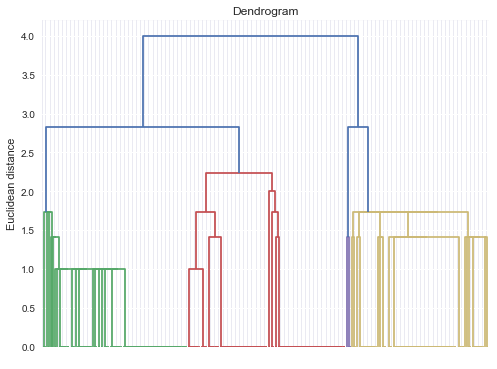

In [207]:
# Мнтересно, какие получатся результаты, если мы квадрат евклидова расстояния заменим на евклидово расстояние
link_s_e = linkage(df, 'single', 'euclidean')

# Строим дендрограмму

fig = plt.figure(figsize = (8,6))
dend = dendrogram(link_s_e)
plt.xticks(color='w')
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [208]:
# Добавляем в исходные данные столбец с результатами кластеризации
df['cluster_s_e'] = fcluster(link_s_e, 2.5, criterion = 'distance')
df.groupby('cluster_s_e').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_w_e,cluster_s_s
cluster_s_e,,,,,,,,,,,,,
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.000000,1.0
2,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000,3.508333,2.0
3,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000,1.000000,3.0
4,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385,1.000000,4.0


Этого, наверное, следовало ожидать: мы получили схожие результаты при использовании метода ближайшего соседа (но использовании 2-х различных метрик: евклидова и квадрата евклидова расстояний).

Тем не менее, результаты не поддаются однозначной и понятной интерпретации по сравнению с методом Варда.

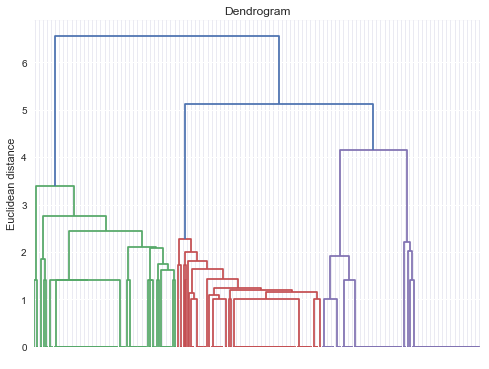

In [209]:
# Попробуем применить метод среднего и евклидово расстояние
link_a_e = linkage(df, 'average', 'euclidean')


fig = plt.figure(figsize = (8,6))
dend = dendrogram(link_a_e)
plt.xticks(color='w')
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [210]:
df['cluster_a_e'] = fcluster(link_a_e, 3.8, criterion = 'distance')
df.groupby('cluster_a_e').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_w_e,cluster_s_s,cluster_s_e
cluster_a_e,,,,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111,1.0,3.962963,3.962963
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.0,1.000000,1.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,4.0,2.000000,2.000000
4,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,3.0,2.000000,2.000000


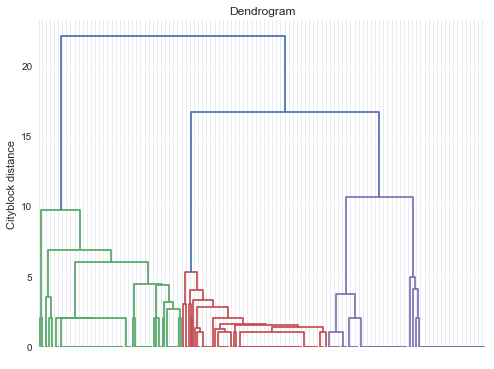

In [140]:
# И, наконец, метод среднего и расстояние манхэттен
link_a_c = linkage(df, 'average', 'cityblock')


fig = plt.figure(figsize = (8,6))
dend = dendrogram(link_a_c)
plt.xticks(color='w')
plt.title('Dendrogram')
plt.ylabel('Cityblock distance')
plt.show()

In [211]:
df['cluster_a_c'] = fcluster(link_a_c, 10.5, criterion = 'distance')
df.groupby('cluster_a_c').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_w_e,cluster_s_s,cluster_s_e,cluster_a_e
cluster_a_c,,,,,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111,1.0,3.962963,3.962963,1.0
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.0,1.000000,1.000000,2.0
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,4.0,2.000000,2.000000,3.0
4,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,3.0,2.000000,2.000000,4.0


Результаты кластеризации методом среднего (для евклидовой и манхэттеновской метрик) оказались аналогичным результатам при использовании метода Варда (и евклидовой метрики). Мы проверили не все методы (да это и не нужно), но уже можно сделать выводы.

### Вывод по работе №1
В ходе проведенного иерархического кластерного анализа интерпретируемые и "понятные" результаты удалось получить методом Варда и методом среднего (в обоих случаях применялась евклидова метрика). В результате кластеризации были выявлены 4 группы, у каждой из которых можно выявить ключевые потребности. Понимая желания каждой из групп, легче будет предоставить востребованный для представителей групп продукт.

### Работа №2 - кластерный анализ методом k-means

In [212]:
#  Будем использовать процедуру KMeans из библиотеки sklearn
from sklearn.cluster import KMeans

### ШАГИ 1-2. Отбор переменных, стандартизация
Аналогичны шагам в работе №1, т.к. работаем с тем же набором данных


### ШАГ 3. Определение количества кластеров
<br>
Для определения количества кластеров построим график каменистой осыпи. Мы знаем, что критерий качества W будет уменьшаться при увеличении числа кластеров k. При этом мы хотим понять, при каком оптимальном k дальнейшее изменение W будет не столь значительным. 

В качестве диапазона изменения k для начала выберем [1, 10]. Если бы даже у нас не было предположений о примерном значении k (а оно у нас есть после выполнения П.Р. №1), рассмотрение такого интервала кажется неплохим для начала.

In [213]:
# Диапазон изменения k - от 1 до 10 включительно
K = range(1, 11) 


# Вычисляем значения критерия качества W для разного числа кластеров, используя метод KMeans
# Количество генерируемых кластеров (а также центроидов кластеров) задается значением k.
# По умолчанию для определения начальных центров кластеров используется метод k-means++. Если коротко - центр первого
# кластера случайно равновозможно выбирается из всех наблюдений, а вероятность выбора следующих центроидов случайна,
# при этом ~ расстоянию до ближайшего из более ранних центроидов (у дальних наблюдений вероятность больше стать центроидами)

models = [KMeans(n_clusters = k, random_state = 42).fit(df) for k in K]

# Нужно разобраться с ошибкой, пока что не понимаю, в чем проблема.

# Список со значениями W для каждого k
dist = [model.inertia_ for model in models]
# inertia_ - критерий качества W - общая дисперсия

C:\Users\qwerty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


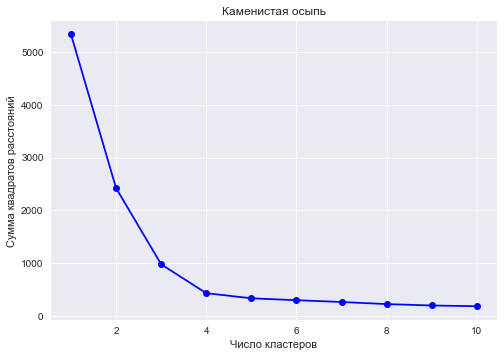

In [214]:
# Строим график "каменистая осыпь"

plt.plot(K, dist, marker = 'o', color = 'b')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

По графику видим, что начиная с количества кластеров, равного 4-м, общая дисперсия W меняется не столь сильно, как прежде. При последующем увеличении k, вероятно, происходит деление более плотных кластеров на части. Будем считать оптимальным значение k=4
с точки зрения оптимальности W (суммы квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера).

### ШАГ 4. Получение результатов

In [215]:
#  максимальное число итераций, чтобы сильно не затягивать. Т.к. возможен неудачный выбор начальных центров кластеров,
# проведем несколько кластеризаций (итераций), после получения всех результатов кластеризаций выберем наилучший -
# с минимальным значением W.
max_iter_1 = 100

In [216]:
# инициализация модели. Автоматически используется алгоритм Ллойда для метода k-means 
model = KMeans(n_clusters=4, random_state=42, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )

# n_init - сколько раз делать кластеризацию с разными начальными центрами
# verbose=0- не выдает промежуточные результаты
# random_state - зерно датчика случайных чисел. При повторных вызовах процедуры с тем же значением зерна random_state 
# модель будет давать одинаковые результаты.
# tol - пороговое значение. Если W меняется на итерации менее tolerance, то можно прекратить кластеризацию


In [217]:
# Кластеризация данных из таблицы df
model.fit(df)

KMeans(max_iter=100, n_clusters=4, random_state=42)

In [218]:
#  Сколько итераций потребовалось процедуре?
model.n_iter_

# Алгоритм успел завершить работу до того, как кончились итерации. Это хорошо.

2

In [219]:
#  Результат кластеризации набора данных из таблицы df
model.labels_ 

# labels_ -указывает номер кластера
# Получили 4 кластера с нумерацией от 0 до 3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [220]:
# координаты центров каждого из трех кластеров - совпадают со средними значениями 
model.cluster_centers_

array([[2.82407407, 2.83333333, 2.76851852, 2.62037037, 2.61111111,
        2.58333333, 2.75      , 2.91666667, 4.9537037 , 4.81481481,
        4.86111111, 1.        , 3.96296296, 3.96296296, 1.        ,
        1.        ],
       [4.84545455, 4.8       , 4.83636364, 4.68181818, 3.03636364,
        3.03636364, 3.        , 2.99090909, 3.07272727, 3.04545455,
        3.04545455, 2.        , 1.        , 1.        , 2.        ,
        2.        ],
       [3.        , 3.        , 3.        , 3.        , 4.85245902,
        4.85245902, 3.        , 2.91803279, 2.75409836, 2.75409836,
        2.75409836, 4.        , 2.        , 2.        , 3.        ,
        3.        ],
       [3.        , 2.96610169, 2.96610169, 2.91525424, 2.91525424,
        2.94915254, 4.91525424, 4.91525424, 3.        , 3.        ,
        3.        , 3.        , 2.        , 2.        , 4.        ,
        4.        ]])

In [221]:
# Добавим столбец к исходной таблице, в котором укажем номер кластера для каждой записи (=строки=участника).
df['cluster_k-means'] = model.labels_
df.groupby('cluster_k-means').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_w_e,cluster_s_s,cluster_s_e,cluster_a_e,cluster_a_c
cluster_k-means,,,,,,,,,,,,,,,,
0,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111,1.0,3.962963,3.962963,1.0,1.0
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.0,1.000000,1.000000,2.0,2.0
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,4.0,2.000000,2.000000,3.0,3.0
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,3.0,2.000000,2.000000,4.0,4.0


In [222]:
# Посмотрим, сколько значений в каждом из кластеров.
df.groupby('cluster_k-means').size()

cluster_k-means
0    108
1    110
2     61
3     59
dtype: int64

Мы получили такие же составы кластеров, как при использовании иерархического кластерного анализа. Подсказкой для нас был тот факт, что мы уже понимали количество кластеров, однако аналогичный результат был получен при исследовании общей дисперсии W в зависимости от количества кластеров.

### Вывод по работе №2
В ходе проведенного кластерного анализа методом k-means (и алгоритма Ллойда) были получены интерпретируемые результаты, аналогичные результатам иерархического кластерного анализа.

### Работа №3 - кластерный анализ методом DBSCAN

In [223]:
#  Будем использовать процедуру DBSCAN из библиотеки sklearn
from sklearn.cluster import DBSCAN

### ШАГИ 1-2. Отбор переменных, стандартизация
Аналогичны шагам в работах №1-2, т.к. работаем с тем же набором данных

### ШАГ 3. Подбор параметров eps, m

<br>
При использовании метода DBSCAN необходимо задать значения двух параметров. Первый - eps - отвечает за то, какие точки (=объекты) будут считаться близкими; второй - m - определяет количество точек вокруг рассматриваемой, необходимое для признания данной точки корневой (сама точка также включается в подсчет в sklearn).

Метрикой выберем евклидово расстояние (кажется естественным предположением, проверенным в предыдущих работах)

In [225]:
#  Создадим первый объект DBSCAN, зададим значения параметров eps,m по умолчанию.
dbscan_1 = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)

#  Обучим модель  DBSCAN
dbscan_1.fit(df)

DBSCAN()

In [226]:
# Выведем массив с номерами кластеров. Сразу видно, что кластеров очень много...
dbscan_1.labels_

array([ 0,  1, -1,  1,  0,  1, -1,  1,  2, -1, -1, -1,  3, -1, -1,  3,  3,
        3,  3,  3,  3,  3, -1,  3,  3,  3,  3, -1, -1, -1,  2,  2,  0,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4, -1,
        4, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,  2,
        2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0, -1, -1,  0,  0,  0, -1,
       -1,  0,  0,  0,  2,  2,  2,  2, -1,  5, -1,  5,  5,  5,  6,  6,  5,
        5,  6,  5,  7, -1,  6,  7,  7,  5,  5,  5,  5,  5,  6,  5,  5,  5,
        5,  5,  6, -1,  5,  6,  5,  7,  6,  5, -1,  5,  6,  7,  5,  5,  5,
        5,  6,  5,  5,  5,  5,  5,  5,  6,  5,  5,  5,  5, -1,  5,  7,  5,
       -1,  5, -1,  6,  5,  5,  7, -1, -1,  8,  8,  8, -1, -1, -1, -1,  5,
        5, -1,  8, -1, -1, -1,  8,  8, -1, -1,  5,  5,  5,  5,  5,  7,  5,
       -1, -1,  6,  6,  5,  7, -1, -1, -1, -1, -1,  7, -1,  6,  9, 10, 11,
       10, 11,  9,  9,  9

In [227]:
#  В numpy создаем таблицу частот 
#  Вариант замены для value_counts() в случае массива взята из лекции и представлена ниже

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 60]
 [ 0 10]
 [ 1  5]
 [ 2 49]
 [ 3 12]
 [ 4  9]
 [ 5 49]
 [ 6 15]
 [ 7 10]
 [ 8  6]
 [ 9 37]
 [10 10]
 [11  5]
 [12  9]
 [13 52]]


Видим 14 кластеров и 60 (!) выбросов. Кластеры получились слишком мелкими. Попробуем увеличить число точек, необходимых для формирования кластера.

In [228]:
dbscan_2 = DBSCAN(eps=0.5, metric='euclidean', min_samples=10)

#  Обучим модель  DBSCAN
dbscan_2.fit(df)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 94]
 [ 0 10]
 [ 1 49]
 [ 2 12]
 [ 3 49]
 [ 4 15]
 [ 5 10]
 [ 6 37]
 [ 7 10]
 [ 8 52]]


Видим, что кластеров стало меньше, но сколько выбросов... Попробуем теперь увеличить значения обоих параметров.

In [229]:
dbscan_3 = DBSCAN(eps=1, metric='euclidean', min_samples=15)

#  Обучим модель  DBSCAN
dbscan_3.fit(df)

unique, counts = np.unique(dbscan_3.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1  69]
 [  0 101]
 [  1  49]
 [  2  15]
 [  3  37]
 [  4  15]
 [  5  52]]


Все еще много выбросов, увеличим немного eps.

In [230]:
dbscan_4 = DBSCAN(eps=2, metric='euclidean', min_samples=15)

#  Обучим модель  DBSCAN
dbscan_4.fit(df)

unique, counts = np.unique(dbscan_4.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   4]
 [  0 110]
 [  1 104]
 [  2  61]
 [  3  59]]


Уже намного лучше! Видим 4 кластера и небольшое количество выбросов (4 наблюдения из 338). Попробуем еще увеличить eps,m...

In [231]:
dbscan_5 = DBSCAN(eps=2.6, metric='euclidean', min_samples=20)

#  Обучим модель  DBSCAN
dbscan_5.fit(df)

unique, counts = np.unique(dbscan_5.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   4]
 [  0 110]
 [  1 104]
 [  2  61]
 [  3  59]]


Результаты прежние. Считаю, что на этом можно остановиться. Одной из подсказок к такой остановке можно считать тот факт, что состав кластеров похож на полученные нами ранее результаты (в работах 1-2). Помимо этого, сам факт того, что при изменении параметров не происходит изменений, говорит о том, что достигнуто некое состояние (побоюсь называть его "устойчивым" или "равновесным", но все же), на которое нужно обратить внимание. 

Остановилась бы я на данном этапе, если бы не имела представления о количестве кластеров? Скорее всего, нет. Обратила бы я внимание на результат 4-ой и 5-ой итераций? Определенно да. 

In [232]:
# Добавим в df информацию о кластерах dbscan

df['dbscan'] = dbscan_5.labels_

In [233]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_w_e,cluster_s_s,cluster_s_e,cluster_a_e,cluster_a_c,cluster_k-means,dbscan
0,4,5,5,5,3,3,3,3,3,3,3,2,1,1,2,2,1,0
1,5,4,5,5,3,3,3,3,3,3,3,2,1,1,2,2,1,0
2,5,5,4,5,3,3,3,3,3,3,3,2,1,1,2,2,1,0
3,5,4,5,5,3,3,3,3,3,3,3,2,1,1,2,2,1,0
4,4,5,5,5,3,3,3,3,3,3,3,2,1,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3,3,2,2,4,4,3,3
334,3,3,3,3,3,3,5,5,3,3,3,3,2,2,4,4,3,3
335,3,3,3,3,3,3,5,5,3,3,3,3,2,2,4,4,3,3
336,3,3,3,3,3,3,5,5,3,3,3,3,2,2,4,4,3,3


In [234]:
# Удалим для итогового сравнения столбцы 'cluster_s_s', 'cluster_s_e', 'cluster_a_e', 'cluster_a_c'
df.drop(['cluster_s_s', 'cluster_s_e', 'cluster_a_e', 'cluster_a_c'],  axis = 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_w_e,cluster_k-means,dbscan
0,4,5,5,5,3,3,3,3,3,3,3,2,1,0
1,5,4,5,5,3,3,3,3,3,3,3,2,1,0
2,5,5,4,5,3,3,3,3,3,3,3,2,1,0
3,5,4,5,5,3,3,3,3,3,3,3,2,1,0
4,4,5,5,5,3,3,3,3,3,3,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3,3,3,3


In [235]:
# Сравним результаты кластеризации с методом к средних
tab = pd.crosstab(df['cluster_k-means'], df['dbscan'])
print(tab)

dbscan           -1    0    1   2   3
cluster_k-means                      
0                 4    0  104   0   0
1                 0  110    0   0   0
2                 0    0    0  61   0
3                 0    0    0   0  59


Видим, что состав кластеров совпадает (за исключением 4-х выбросов, которые в иерархическом КА и методе k-means отнеслись бы к кластеру 0 в нумерации k-means). Итеративно были были подобраны параметры модели.

### Вывод по работе №3
В ходе проведенного кластерного анализа методом DBSCAN были получены интерпретируемые результаты, схожие с результатами иерархического кластерного анализа и метода k-means.

### Общие выводы по работам 1-3

Изученные методы кластеризации позволили различными способами получить состав кластеров и их количество. Участники опроса были разделены на 4 группы, у каждой из которых выделяются основные "потребности". Корректность реультатов основывается на понятной интерпретации полученных кластеров, измеримости и большом объеме каждой из групп.

Краткое название каждой из групп

<b>Группа №1 </b> - <b>"больные"</b>.

<b>Группа №2</b> - <b>"чистюли"</b>.

<b>Группа №3</b> - <b>"мыслители"</b>.

<b>Группа №4</b> -  <b>"сладкоежки"</b>.